# **Lista 5** de Aprendizagem Automática

## **Assuntos:** SVM e Comitês de Modelos

*   **Aluna:** Bárbara Neves
*   **Matrícula:** 507526

---

> <font color='blue'>**Jupyter notebook desenvolvido no Google Colab.**</font> Também pode ser acessado através do [link](https://github.com/barbaraneves/masters-machine-learning-course) no GitHub, sem alterações após o envio pelo SIGAA.



# Imports Principais

Neste notebook, utilizo apenas as bibliotecas presentes na célula abaixo, juntamente com alguns módulos da biblioteca **Scikit-learn**.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Implementações

## Utils

<font color='red'>**Sobre o código:**</font> a seguir estão as funções auxiliares, utilitárias ou de suporte que são usadas para auxiliar na resolução das questões desta lista de exercícios. As três primeiras funções presentes na primeira célula desta seção foram criadas para a Lista 2 e reaproveitadas aqui.

In [ ]:
from sklearn.preprocessing import StandardScaler

# FUNÇÕES DA LISTA 2
def plot_class_counts(data, width=6, height=5, palette='coolwarm'):
  # Set the figure size
  plt.figure(figsize=(width, height))

  # Plot count of occurrences for each class
  sns.countplot(data=data, palette=palette)
  plt.xlabel('Classes')
  plt.ylabel('Count')
  plt.show()

def normalize_data(X):
  scaler = StandardScaler()
  X_norm = scaler.fit_transform(X)
  X_norm = pd.DataFrame(X_norm, columns=X.columns)

  fig, axs = plt.subplots(1, 2, figsize=(12, 6))
  sns.lineplot(data=X, ax=axs[0], legend=False, palette='coolwarm_r')
  axs[0].set_title('Antes da Normalização')
  sns.lineplot(data=X_norm, ax=axs[1], legend=False, palette='coolwarm')
  axs[1].set_title('Depois da Normalização')
  plt.show()

  return X_norm.values

def plot_gaussian_distribution(data):
  sns.kdeplot(data, legend=False, palette='coolwarm', fill=True, common_norm=False)

  plt.title("Distribuição de X")
  plt.xlabel('Valores')
  plt.ylabel('Densidade')
  plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def plot_classification_report(models_data):
  for model_data in models_data:
    y_true, y_pred, params = model_data['y_true'], model_data['y_pred'], model_data['params']
    model_name = model_data['model_name']

    params_str = str(params).replace("{", "").replace("}", "")

    print("-" * 75)
    print(f"MODELO = {model_name} -> {params_str}")
    print("-" * 75)
    print(classification_report(y_true, y_pred))

def plot_confusion_matrices(models_data, palette='coolwarm'):
  num_models = len(models_data)
  fig, axes = plt.subplots(1, num_models, figsize=(5*num_models, 4))

  sns.set(style="white")

  for i, model_data in enumerate(models_data):
    y_true, y_pred = model_data['y_true'], model_data['y_pred']
    model_name = model_data['model_name']

    cm = confusion_matrix(y_true, y_pred)

    ax = axes[i] if num_models > 1 else axes
    sns.heatmap(cm, annot=True, fmt="d", cmap=palette, ax=ax)
    ax.set_title(f"Matriz de Confusão - {model_name}")
    ax.set_xlabel('Valores Preditos')
    ax.set_ylabel('Valores Verdadeiros')

  plt.tight_layout()
  plt.show()

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

def plot_roc_pr_curves(X_test, y_test, model_1, model_2, model_1_name, model_2_name, figsize=(10, 4), palette='coolwarm'):
  # Calculando as métricas e curvas ROC para o modelo 1
  model_1_y_scores = model_1.decision_function(X_test)
  model_1_fpr, model_1_tpr, _ = roc_curve(y_test, model_1_y_scores)
  model_1_roc_auc = auc(model_1_fpr, model_1_tpr)

  # Calculando as métricas e curvas ROC para o modelo 2
  model_2_y_scores = model_2.predict_proba(X_test)[:, 1]
  model_2_fpr, model_2_tpr, _ = roc_curve(y_test, model_2_y_scores)
  model_2_roc_auc = auc(model_2_fpr, model_2_tpr)

  colors = sns.color_palette(palette, n_colors=4)
  sns.set(style="whitegrid")

  # Plotando as curvas ROC
  plt.figure(figsize=figsize)
  plt.subplot(1, 2, 1)
  sns.lineplot(x=model_1_fpr, y=model_1_tpr, label='%s (AUC = %0.2f)' % (model_1_name, model_1_roc_auc), color=colors[0])
  sns.lineplot(x=model_2_fpr, y=model_2_tpr, label='%s (AUC = %0.2f)' % (model_2_name, model_2_roc_auc), color=colors[3])
  plt.plot([0, 1], [0, 1], '--', color='lightslategray')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Taxa de Falsos Positivos')
  plt.ylabel('Taxa de Verdadeiros Positivos')
  plt.title('Curva ROC')
  plt.legend(loc="lower right")

  # Calculando as métricas e curvas Precision-Recall para o modelo 1
  model_1_precision, model_1_recall, _ = precision_recall_curve(y_test, model_1_y_scores)
  model_1_pr_auc = auc(model_1_recall, model_1_precision)

  # Calculando as métricas e curvas Precision-Recall para o modelo 2
  model_2_precision, model_2_recall, _ = precision_recall_curve(y_test, model_2_y_scores)
  model_2_pr_auc = auc(model_2_recall, model_2_precision)

  # Plotando as curvas Precision-Recall
  plt.subplot(1, 2, 2)
  sns.lineplot(x=model_1_recall, y=model_1_precision, label='%s (AUC = %0.2f)' % (model_1_name, model_1_pr_auc), color=colors[0])
  sns.lineplot(x=model_2_recall, y=model_2_precision, label='%s (AUC = %0.2f)' % (model_2_name, model_2_pr_auc), color=colors[3])
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Curva Precision-Recall')
  plt.legend(loc="lower right")

  plt.tight_layout()
  plt.show()

# Questão 1

Considere o conjunto de dados disponível em `californiabin.csv`, organizado
em 9 colunas, sendo as 8 primeiras colunas os atributos e a última coluna a
saída.

Os 8 atributos são usados na predição de preços de casas em distritos
da Califórnia na década de 1990. A saída é binária: 0, para abaixo da mediana
dos preços; 1, para acima da mediana dos preços.

In [ ]:
df = pd.read_csv('californiabin.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8
0,4.1685,20.0,6.700637,1.178344,745.0,2.372611,38.80,-121.15,1.0
1,2.8194,24.0,4.762500,1.020833,608.0,2.533333,36.75,-119.85,0.0
2,2.4250,46.0,4.927711,1.018072,772.0,2.325301,36.33,-119.31,0.0
3,3.1205,16.0,3.728477,1.101545,1260.0,2.781457,33.87,-117.99,0.0
4,4.3889,41.0,5.741007,1.199041,837.0,2.007194,34.15,-118.40,1.0


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.904364,28.509500,5.417501,1.090020,1421.657500,2.909150,35.697790,-119.646690,0.500000
std,1.912417,12.715099,2.121688,0.348978,1225.902672,0.742232,2.150273,1.999555,0.500125
min,0.536000,2.000000,0.888889,0.500000,9.000000,1.066176,32.550000,-124.180000,0.000000
25%,2.586875,18.000000,4.439494,1.004505,784.000000,2.420881,33.940000,-121.840000,0.000000
50%,3.574450,28.000000,5.283862,1.048582,1173.000000,2.821757,34.355000,-118.685000,0.500000
75%,4.753675,38.000000,6.064881,1.098424,1714.250000,3.280020,37.720000,-118.050000,1.000000
max,15.000100,52.000000,56.269231,10.153846,28566.000000,9.196203,41.950000,-114.610000,1.000000


In [ ]:
df.iloc[:, -1:].value_counts()

8  
0.0    1000
1.0    1000
dtype: int64

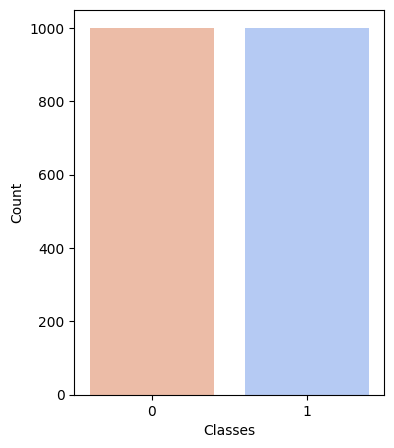

In [ ]:
class_data = [i*j for i, j in df.iloc[:, -1:].value_counts().items()]

plot_class_counts(class_data, width=4, height=5, palette='coolwarm_r')

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:].values.ravel()

X.shape, y.shape

((2000, 8), (2000,))

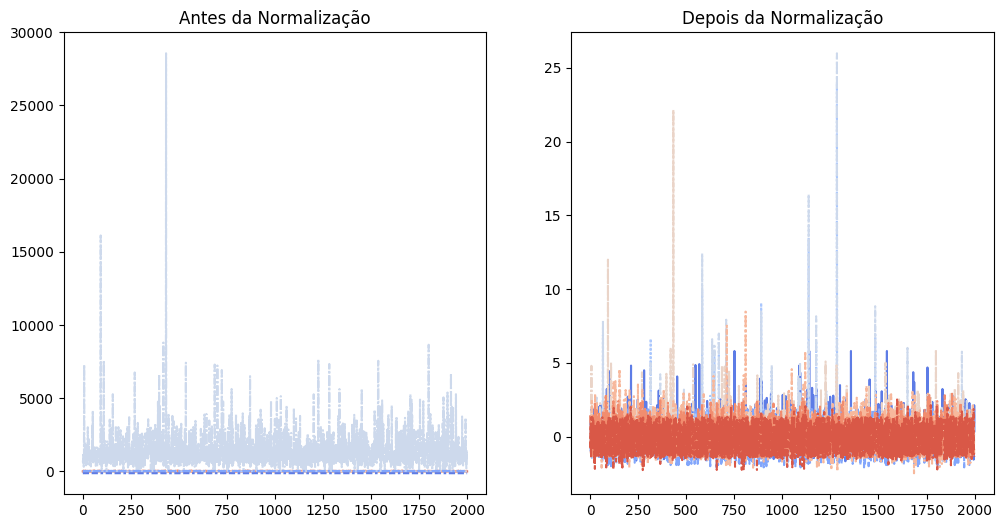

In [ ]:
X_norm = normalize_data(X)
X = X.values

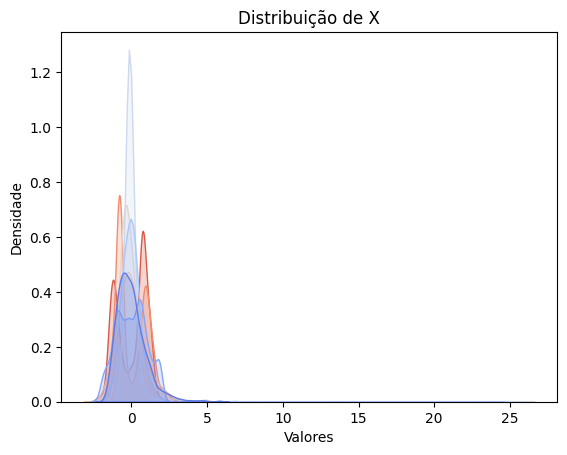

In [ ]:
plot_gaussian_distribution(data=X_norm)

---

**Observações:**

> É importante ressaltar que o dataset *California Housing* é balanceado, o que é relevante porque isso "deve evitar" qualquer viés nos modelos de SVM e Random Forest.

> Os dados foram normalizados porque, para o SVM, a normalização é importante já que ele usa medidas de distância para classificar os dados. Se os atributos tiverem escalas muito diferentes, alguns atributos podem ter uma influência maior na classificação do que outros.

> No caso do Random Forest, a normalização também é benéfica porque cada árvore de decisão  é treinada em uma amostra aleatória dos dados. Se os atributos não forem normalizados, alguns atributos com valores maiores podem ter uma influência desproporcional durante o treinamento de cada árvore, prejudicando a combinação dos resultados.

> Os plots dos gráficos acima ilustram o processo de normalização realizado para X (`X_norm`).

## a) Divisão dos Dados e Treinamento dos Modelos

> Considerando uma divisão de 80% dos padrões para treinamento e 20% para teste, avalie modelos de classificação binária nos dados em questão. Para tanto, use as abordagens abaixo:
- **SVM:** Escolha um *kernel* **RBF** e use **grid-search** para ajustar os hi-
perparâmetros $C$ (valores $2^{-5}, 2^{-3}, 2^{-1}, \cdots, 2^{11}, 2^{13}, 2^{15}$) e $\gamma$ (valores $2^{−15}, 2^{−13}, 2^{−11}, \cdots, 2^{1}, 2^{2}, 2^{3}$).
- **Random Forest:** Use *grid-search* para ajustar o número de classificadores base (valores $10, 20, \cdots, 180, 190, 200$) e a máxima profundidade (*max depth*, valores $4, 6, 8, 10$ ou máxima (`None` no sklearn)).

In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 8), (400, 8), (1600,), (400,))

In [ ]:
svm_params = {
    'C': np.power(2, np.arange(-5, 16, 2, dtype=float)),
    'gamma': np.power(2, np.arange(-15, 4, 2, dtype=float))
}

rf_params = {
    'n_estimators': list(range(10, 201, 10)),
    'max_depth': [4, 6, 8, 10, None]
}

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model = SVC(kernel='rbf', random_state=42)

svm_grid_search = GridSearchCV(svm_model,
                               svm_params,
                               cv=10,
                               verbose=2)
svm_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 110 candidates, totalling 1100 fits
[CV] END ..................C=0.03125, gamma=3.0517578125e-05; total time=   0.2s
[CV] END ..................C=0.03125, gamma=3.0517578125e-05; total time=   0.2s
[CV] END ..................C=0.03125, gamma=3.0517578125e-05; total time=   0.2s
[CV] END ..................C=0.03125, gamma=3.0517578125e-05; total time=   0.2s
[CV] END ..................C=0.03125, gamma=3.0517578125e-05; total time=   0.2s
[CV] END ..................C=0.03125, gamma=3.0517578125e-05; total time=   0.2s
[CV] END ..................C=0.03125, gamma=3.0517578125e-05; total time=   0.3s
[CV] END ..................C=0.03125, gamma=3.0517578125e-05; total time=   0.2s
[CV] END ..................C=0.03125, gamma=3.0517578125e-05; total time=   0.2s
[CV] END ..................C=0.03125, gamma=3.0517578125e-05; total time=   0.2s
[CV] END ...................C=0.03125, gamma=0.0001220703125; total time=   0.3s
[CV] END ...................C=0.03125, gamma

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': array([3.1250e-02, 1.2500e-01, 5.0000e-01, 2.0000e+00, 8.0000e+00,
       3.2000e+01, 1.2800e+02, 5.1200e+02, 2.0480e+03, 8.1920e+03,
       3.2768e+04]),
                         'gamma': array([3.05175781e-05, 1.22070312e-04, 4.88281250e-04, 1.95312500e-03,
       7.81250000e-03, 3.12500000e-02, 1.25000000e-01, 5.00000000e-01,
       2.00000000e+00, 8.00000000e+00])},
             verbose=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(rf_model,
                              rf_params,
                              cv=10,
                              verbose=2)
rf_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=20; total time=   0.1s
[CV] END .......................max_depth=4,

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, 10, None],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200]},
             verbose=2)

## b) Avaliação dos Melhores Modelos

Para cada modelo campeão, reporte os hiperparâmetros selecionados e as métricas de **acurácia**, **revocação**, **precisão** e **F1-score** nos dados de teste. Plote também a **curva ROC** e a curva **Precision-Recall**.

In [ ]:
svm_best_model = svm_grid_search.best_estimator_
svm_best_params = svm_grid_search.best_params_

rf_best_model = rf_grid_search.best_estimator_
rf_best_params = rf_grid_search.best_params_

In [ ]:
svm_best_model.fit(X_train, y_train)

SVC(C=2.0, gamma=0.5, random_state=42)

In [ ]:
rf_best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=70, random_state=42)

In [ ]:
# Predição dos rótulos dos dados de teste
y_pred_svm = svm_best_model.predict(X_test)
y_pred_rf = rf_best_model.predict(X_test)

y_pred_svm.shape, y_pred_rf.shape

((400,), (400,))

In [ ]:
model_results = [
    {
        'model_name': 'SVM',
        'y_true': y_test,
        'y_pred': y_pred_svm,
        'params': svm_best_params
    },
    {
        'model_name': 'RandomForestClassifier',
        'y_true': y_test,
        'y_pred': y_pred_rf,
        'params': rf_best_params
    }
]

plot_classification_report(model_results)

---------------------------------------------------------------------------
MODELO = SVM -> 'C': 2.0, 'gamma': 0.5
---------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       186
         1.0       0.87      0.82      0.84       214

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400

---------------------------------------------------------------------------
MODELO = RandomForestClassifier -> 'max_depth': None, 'n_estimators': 70
---------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83       186
         1.0       0.87      0.82      0.84       214

    accuracy                           0.83       400
   macro avg       0.83      0.84      

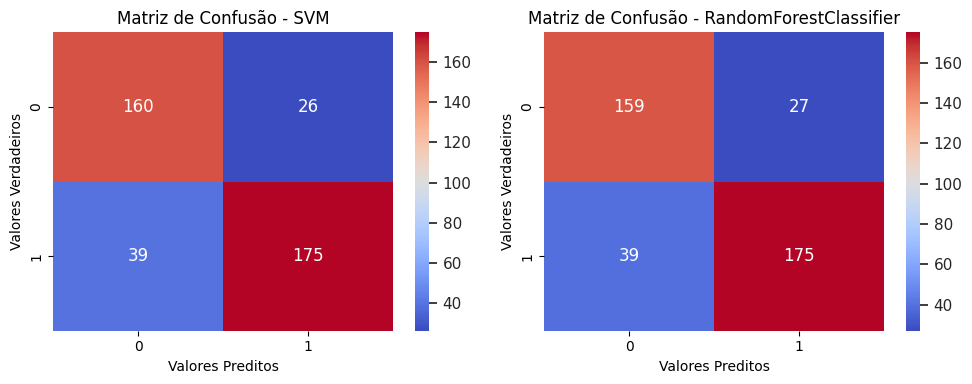

In [ ]:
model_results_wo_params = [{k: v for k, v in model.items() if k != 'params'} for model in model_results]

plot_confusion_matrices(model_results_wo_params)

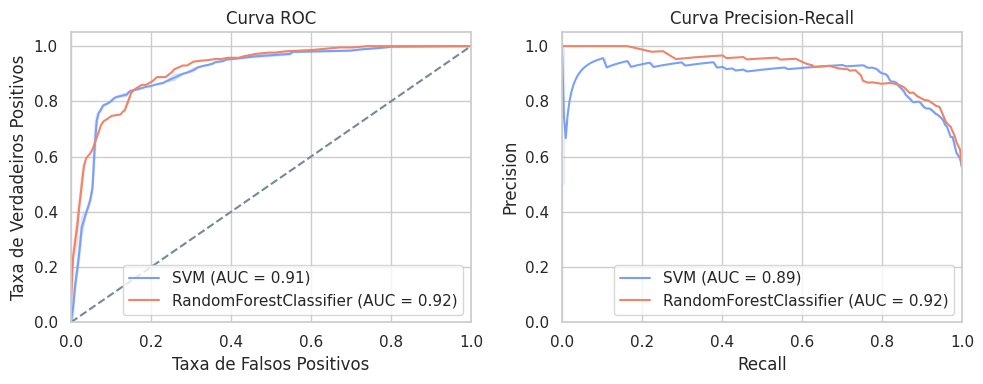

In [ ]:
plot_roc_pr_curves(X_test=X_test, y_test=y_test,
                   model_1=svm_best_model, model_2=rf_best_model,
                   model_1_name='SVM', model_2_name='RandomForestClassifier')

---

**Observações gerais:**

> Analisando os resultados, podemos observar que ambos os modelos tiveram desempenhos bastante similares em todas as métricas de avaliação. Os valores para a acurácia, precisão, revocação e F$_1$-score são consistentes entre os dois modelos, com valores próximos de 0.82 a 0.87. Isso indica que ambos os modelos são capazes de classificar corretamente os padrões com alta taxa de acerto.

> Ao analisar as matrizes de confusão para cada modelo, observamos que tanto o SVM quanto o Random Forest apresentam uma proporção equilibrada de verdadeiros positivos e verdadeiros negativos, com um número relativamente baixo de falsos positivos e falsos negativos. Isso é evidenciado pela distribuição das previsões corretas (verdadeiros positivos e verdadeiros negativos) e incorretas (falsos positivos e falsos negativos) nas matrizes de confusão.

> A área sob a curva (AUC) é uma métrica que resume a curva ROC ou Precision-Recall em um único valor. Quanto maior o valor da AUC, melhor é o desempenho do modelo na classificação dos dados. Tanto o SVM quanto o Random Forest apresentam valores de AUC próximos, indicando um bom desempenho em ambas as curvas.

> Em resumo, os resultados indicam que tanto o SVM quanto o Random Forest são modelos capazes de realizar uma classificação precisa nos dados de teste. Ambos apresentam desempenho semelhante e satisfatório, com métricas de avaliação consistentes.